# A textured domain wall in a helimagnet

In [1]:
(* local spin S *)
S[theta_, phi_] := {
    Sin[theta]*Cos[phi],
    Sin[theta]*Sin[phi],
    Cos[theta]
};

(* partial derivatives *)
dSdc[Si_, ax_, r_, theta_, phi_] := 
    D[Si, r]     * D[r, ax] +
    D[Si, theta] * D[theta, ax] +
    D[Si, phi]   * D[phi, ax];
    
(*(* spherical -> cartesian derivatives *)
dsdc[r_, theta_, phi_] := {
    {Sin[theta]*Cos[phi], (1/r)*Cos[theta]*Cos[phi], -(1/r)*(Sin[phi]/sin[theta])},
    {Sin[theta]*Sin[phi], -(1/r)*Cos[theta]*Sin[phi], (1/r)*(Cos[phi]/sin[theta])},
    {Cos[theta], -(1/r)*Sin[theta], 0}
};*)

## 1D

In [7]:
(* Del S *)
DS1[r_, theta_, phi_] := {
    dSdc[S[theta, phi][[1]], x, r, theta, phi],
    dSdc[S[theta, phi][[2]], x, r, theta, phi],
    dSdc[S[theta, phi][[3]], x, r, theta, phi]
};

U1[A_, K_, r_, theta_, phi_] :=
    (A/2) * DS1[r, theta, phi].Transpose[DS1[r, theta, phi]] -
    (K/2) * S[theta, phi][[3]]^2;

2           2              2      2
-(K Cos[θ[x]] ) + A θ'[x]  + A Sin[θ[x]]  ϕ'[x]
------------------------------------------------
                       2
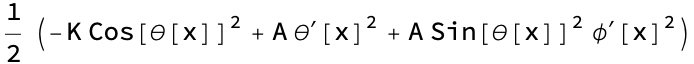

In [61]:
V1 = U1[A, K, r[x], \[Theta][x], \[Phi][x]];
Simplify[V1]

DSolve::deqn:                                                                                     2      2                                                          2                                                          2                                                          2      2                                                          2                                                          2
                                                    1              2    A (Sin[Î¸[x]]  Î¸'[x]  + (Cos[Î¸[x]] Sin[Ï[x]] Î¸'[x] + Cos[Ï[x]] Sin[Î¸[x]] Ï'[x])  + (Cos[Î¸[x]] Cos[Ï[x]] Î¸'[x] - Sin[Î¸[x]] Sin[Ï[x]] Ï'[x]) )                         1              2    A (Sin[Î¸[x]]  Î¸'[x]  + (Cos[Î¸[x]] Sin[Ï[x]] Î¸'[x] + Cos[Ï[x]] Sin[Î¸[x]] Ï'[x])  + (Cos[Î¸[x]] Cos[Ï[x]] Î¸'[x] - Sin[Î¸[x]] Sin[Ï[x]] Ï'[x]) )
Equation or list of equations expected instead of -(-) (K Cos[Î¸[x]] ) + ------------------------------------------------------------------------------------------------------------------------------------------- in the first argument -(-) (K Cos[Î¸[x]] ) + -------------------------------------------------------------------------------------------------------------------------------------------.
                                                    2                                                                                        2                                                                                              2                                                                                        2

1              2                 2      2
DSolve[-(-) (K Cos[θ[x]] ) + (A (Sin[θ[x]]  θ'[x]  + 
         2
 
                                                                 2
>         (Cos[θ[x]] Sin[ϕ[x]] θ'[x] + Cos[ϕ[x]] Sin[θ[x]] ϕ'[x])  + 
 
                                                                 2
>         (Cos[θ[x]] Cos[ϕ[x]] θ'[x] - Sin[θ[x]] Sin[ϕ[x]] ϕ'[x]) )) / 2, θ[x], x]
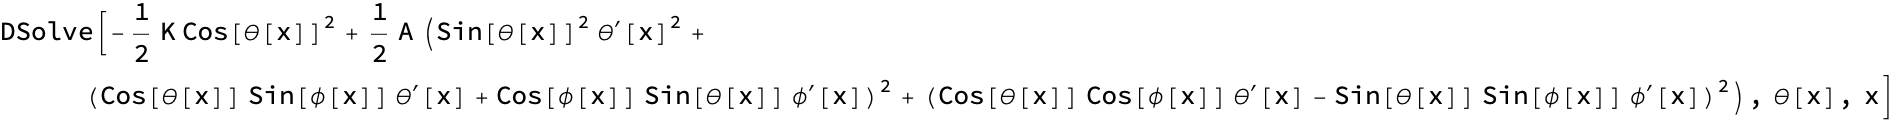

In [68]:
DSolve[V1, \[Theta][x], x]

Euler-Lagrange differential equation  
$\frac{\delta U}{\delta \theta} = \frac{\partial V}{\partial \theta} - \frac{d}{dx}(\frac{\partial V}{\partial \theta'})$  
$\frac{\delta U}{\delta \phi} = \frac{\partial V}{\partial \phi} - \frac{d}{dx}(\frac{\partial V}{\partial \phi'})$

2
K Cos[θ[x]] Sin[θ[x]] + A Cos[θ[x]] Sin[θ[x]] ϕ'[x]  - A θ''[x] == 0
-(A Sin[θ[x]] (2 Cos[θ[x]] θ'[x] ϕ'[x] + Sin[θ[x]] ϕ''[x])) == 0
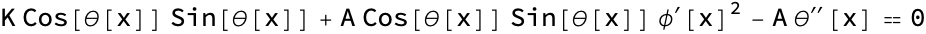
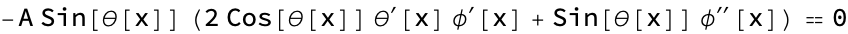

In [30]:
Needs["VariationalMethods`"]
dU1dt = EulerEquations[V1, \[Theta][x], x]
dU1dp = EulerEquations[V1, \[Phi][x], x]

NDSolve::underdet: There are more dependent variables, {Î¸[x], Ï[x]}, than equations, so the system is underdetermined.

2
NDSolve[K Cos[θ[x]] Sin[θ[x]] + A Cos[θ[x]] Sin[θ[x]] ϕ'[x]  - A θ''[x] == 0, θ[x], x]
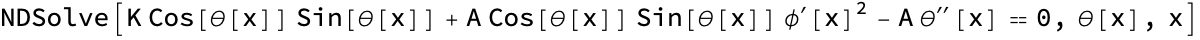

In [53]:
NDSolve[dU1dt, \[Theta][x], x]

## 2D

In [1]:
(* Del S *)
DS2[r_, theta_, phi_] := {
    {dSdc[S[theta, phi][[1]], c[[1]], r, theta, phi], dSdc[S[theta, phi][[1]], c[[2]], r, theta, phi], 0},
    {dSdc[S[theta, phi][[2]], c[[1]], r, theta, phi], dSdc[S[theta, phi][[2]], c[[2]], r, theta, phi], 0},
    {dSdc[S[theta, phi][[3]], c[[1]], r, theta, phi], dSdc[S[theta, phi][[3]], c[[2]], r, theta, phi], 0}
};

(* Laplacian S *)
DDS2[r_, theta_, phi_] := {
    {dSdc[DS[r, theta, phi][[1, 1]], c[[1]], r, theta, phi], dSdc[DS[r, theta, phi][[1, 2]], c[[2]], r, theta, phi], 0},
    {dSdc[DS[r, theta, phi][[2, 1]], c[[1]], r, theta, phi], dSdc[DS[r, theta, phi][[2, 2]], c[[2]], r, theta, phi], 0},
    {dSdc[DS[r, theta, phi][[3, 1]], c[[1]], r, theta, phi], dSdc[DS[r, theta, phi][[3, 2]], c[[2]], r, theta, phi], 0}
};

Cos[θ] Cos[ϕ] θ'[x] - Sin[θ] Sin[ϕ] ϕ'[x]   Cos[θ] Cos[ϕ] θ'[y] - Sin[θ] Sin[ϕ] ϕ'[y]
 
>       0

Cos[θ] Sin[ϕ] θ'[x] + Cos[ϕ] Sin[θ] ϕ'[x]   Cos[θ] Sin[ϕ] θ'[y] + Cos[ϕ] Sin[θ] ϕ'[y]
 
>       0

-(Sin[θ] θ'[x])                             -(Sin[θ] θ'[y])
 
>       0
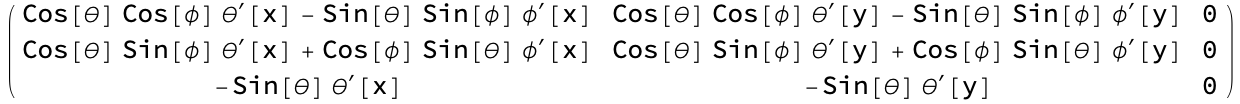

2                                                     2
-(Cos[ϕ] Sin[θ] θ'[x] ) - 2 Cos[θ] Sin[ϕ] θ'[x] ϕ'[x] - Cos[ϕ] Sin[θ] ϕ'[x]    -(Cos[ϕ] 
 
                    2                                                     2
>       Sin[θ] θ'[y] ) - 2 Cos[θ] Sin[ϕ] θ'[y] ϕ'[y] - Cos[ϕ] Sin[θ] ϕ'[y]
 

>    0

                     2                                                     2
-(Sin[θ] Sin[ϕ] θ'[x] ) + 2 Cos[θ] Cos[ϕ] θ'[x] ϕ'[x] - Sin[θ] Sin[ϕ] ϕ'[x]    -(Sin[θ] 
 
                    2                                                     2
>       Sin[ϕ] θ'[y] ) + 2 Cos[θ] Cos[ϕ] θ'[y] ϕ'[y] - Sin[θ] Sin[ϕ] ϕ'[y]
 

>    0

              2
-(Cos[θ] θ'[x] )
 
                   2
>    -(Cos[θ] θ'[y] )
 

>    0
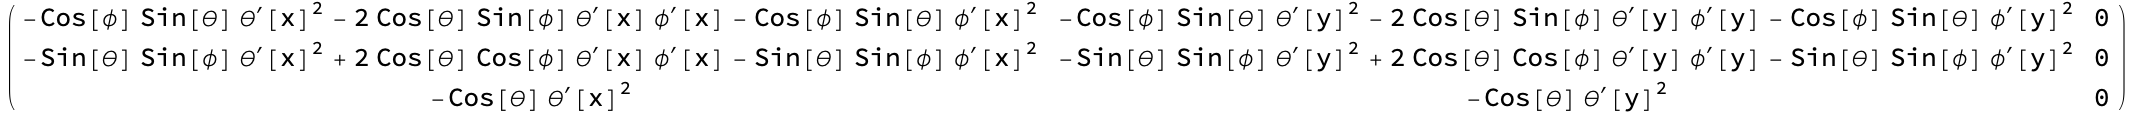

In [18]:
Simplify[DDS[r, \[Theta], \[Phi]]] // MatrixForm